### Treść zadania

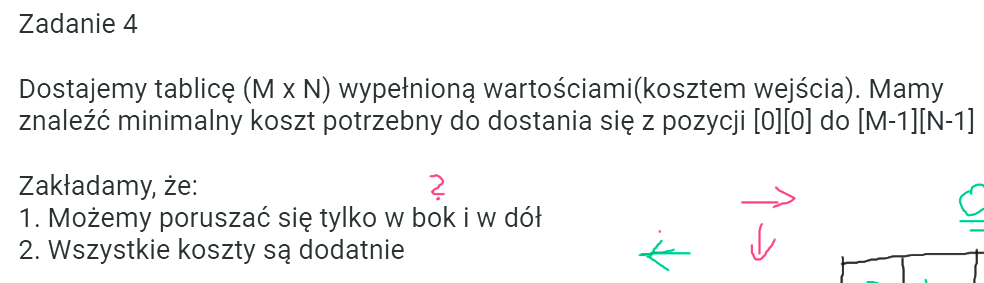

### Omówienie

###### Top-down:
W podejściu top-down, w sposób rekurencyjny wybieramy, czy bardziej opłaca nam się iść w dół, czy w prawo (o ile można iść w dół i w prawo). Jeżeli można iść tylko w dół, bo jesteśmy w ostatnim wierszu, to idziemy w prawo, a jeżeli jesteśmy w ostatniej kolumnie, to idziemy w dół. Za każdym razem zapamiętujemy koszt dojścia do danego punktu.
<br><br>
###### Bottom-up:
W podejściu bottom-up wypełniamy tablicę od początkowego do końcowego punktu (odwrotnie niż w top-down). Najpierw zauważamy, że w pierwszym wierszu oraz w pierwszej kolumnie możemy się poruszać tylko w obrębie tego wiersza/kolumny (tzn. nie da się wejść do pierwszego wiersza z wiersza wyżej, bo takiego nie ma, więc poruszamy się po nim tylko w prawo; analogicznie dla 1. kolumny). Zatem najpierw wypałniamy pierwszy wiersz oraz pierwszą kolumnę wartościami (kosztami przejścia na dane pole), a następnie przechodzimy do wypełniania pozostałej części tablicy pomocniczej, decydując dla każdego pola, czy lepiej do niego wejść z lewej strony (idąc w stronę prawą), czy z góry (idąc w dół) i zapisujemy minimalny koszt dostania się do tego pola.
<br><br>
Rysunek do bottom-up:
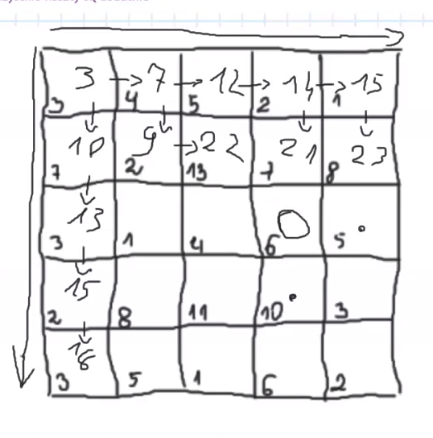

### Implementacja

#### Top-down

In [1]:
def min_cost_td(A: 'matrix with costs', M: 'number of rows', N: 'number of columns'):
    F = [[0] * N for _ in range(M)]
    
    def move(i, j):
        if i == M - 1 and j == N - 1:
            return A[i][j] # Let's say we also have to pay to enter the last field
        # Return memoized cost if exist
        if F[i][j]: return F[i][j]
        # Move right if we are in the last row
        if i == M - 1:
            F[i][j] = move(i, j + 1) + A[i][j]
            return F[i][j] 
        # Move down if we are in the last column
        if j == N - 1:
            F[i][j] = move(i + 1, j) + A[i][j]
            return F[i][j]
        # Else choose if it's better to move down or to move right
        F[i][j] = min(move(i + 1, j), move(i, j + 1)) + A[i][j]
        return F[i][j]
    
    move(0, 0)
    
    return F[0][0], F

##### Dodatkowo implementacja funkcji, pobierającej ścieżkę

In [2]:
def get_path_td(F, M, N):
    points = [(0, 0)]
    i = j = 0
    
    while i < M - 1 and j < N - 1:
        if F[i + 1][j] < F[i][j + 1]:
            i += 1
        else:
            j += 1
        points.append((i, j))
        
    if i == M - 1:
        for j in range(j + 1, N):
            points.append((i, j))
    elif j == N - 1:
        for i in range(i + 1, M):
            points.append((i, j))
            
    return points

#### Bottom-up

In [3]:
def min_cost_bu(A: 'matrix with costs', M: 'number of rows', N: 'number of columns'):
    F = [[0] * N for _ in range(M)]
    F[0][0] = A[0][0]
    
    # Fill the first column
    for i in range(1, M):
        F[i][0] = A[i][0] + F[i - 1][0]
    # Fill the first row
    for j in range(1, N):
        F[0][j] = A[0][j] + F[0][j - 1]
    # Fill the remaining matrix
    for i in range(1, M):
        for j in range(1, N):
            F[i][j] = min(F[i - 1][j], F[i][j - 1]) + A[i][j]
        
    return F[M - 1][N - 1], F

##### Dodatkowo implementacja funkcji, pobierającej ścieżkę

W przypadku podejścia Bottom-up, musimy szukać ścieżki od końca, aby uzyskać prawidłową ścieżkę (odwrotnie do podejścia Top-down, bo również na odwrót tworzyliśmy tablicę $ F $ - tu od punktu $ [0][0] $, a tam od punktu $ [M-1][N-1] $).

In [4]:
def get_path_bu(F, M, N):
    i = M - 1
    j = N - 1
    points = [(i, j)]
    
    while i > 0 and j > 0:
        if F[i - 1][j] < F[i][j - 1]:
            i -= 1
        else:
            j -= 1
        points.append((i, j))
        
    if i == 0:
        for j in range(j - 1, -1, -1):
            points.append((i, j))
    elif j == 0:
        for i in range(i - 1, -1, -1):
            points.append((i, j))
            
    for i in range(len(points) // 2):
        swap(points, i, -i-1)
            
    return points

def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

###### Kilka testów

In [5]:
def test(A):
    M = len(A)
    N = len(A[0])
    
    print('Input array:', A, sep='\n')
    
    print('\n===== Top-down: =====')
    cost_td, F_td = min_cost_td(A, M, N)
    print('Cost:', cost_td)
    print('Costs array:', *F_td, sep='\n')
    path_td = get_path_td(F_td, M, N)
    print()
    print(path_td)
    print('Correct cost?:', sum(A[i][j] for i, j in path_td) == cost_td)

    print('\n\n===== Bottom-up: =====')
    cost_bu, F_bu = min_cost_bu(A, M, N)
    print('Cost:', cost_bu)
    print('Costs array:', *F_bu, sep='\n')
    path_bu = get_path_bu(F_bu, M, N)
    print()
    print(path_bu)
    print('Correct cost?:', sum(A[i][j] for i, j in path_bu) == cost_bu)

    print('\n\nAre costs the same?:', cost_bu == cost_td)
    print('Are paths the same?:', path_td == path_bu, '(they don\'t have to if elements are the same)')
    if path_bu != path_td:
        diff_cost_td = diff_cost_bu = 0
        for p_td, p_bu in zip(path_td, path_bu):
            if p_td != p_bu:
                print('Different points:')
                p_td_cost = A[p_td[0]][p_td[1]]
                p_bu_cost = A[p_bu[0]][p_bu[1]]
                diff_cost_td += p_td_cost
                diff_cost_bu += p_bu_cost
                print('Top-down: ', p_td, f'\t(cost: {p_td_cost})')
                print('Bottom-up:', p_bu, f'\t(cost: {p_bu_cost})')
                print()
        print('Are costs of different paths parts the same?', diff_cost_bu == diff_cost_td)
        print('Cost Top-down on different path parts: ', diff_cost_td)
        print('Cost Bottom-up on different path parts:', diff_cost_bu)

In [6]:
test([
    [3, 4, 5, 2, 1],
    [7, 2, 13, 7, 8],
    [3, 1, 4, 1, 5],
    [2, 8, 11, 1, 3],
    [3, 5, 1, 3, 2]
])

Input array:
[[3, 4, 5, 2, 1], [7, 2, 13, 7, 8], [3, 1, 4, 1, 5], [2, 8, 11, 1, 3], [3, 5, 1, 3, 2]]

===== Top-down: =====
Cost: 21
Costs array:
[21, 18, 21, 16, 19]
[21, 14, 24, 14, 18]
[15, 12, 11, 7, 10]
[16, 19, 17, 6, 5]
[14, 11, 6, 5, 0]

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4)]
Correct cost?: True


===== Bottom-up: =====
Cost: 21
Costs array:
[3, 7, 12, 14, 15]
[10, 9, 22, 21, 23]
[13, 10, 14, 15, 20]
[15, 18, 25, 16, 19]
[18, 23, 24, 19, 21]

[(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (4, 4)]
Correct cost?: True


Are costs the same?: True
Are paths the same?: False (they don't have to if elements are the same)
Different points:
Top-down:  (3, 4) 	(cost: 3)
Bottom-up: (4, 3) 	(cost: 3)

Are costs of different paths parts the same? True
Cost Top-down on different path parts:  3
Cost Bottom-up on different path parts: 3


In [7]:
from random import randint

M = randint(1, 20)
N = randint(1, 20)

test([
    [randint(1, 20) for _ in range(N)] for _ in range(M)
])

Input array:
[[4, 6, 18, 12, 6], [3, 18, 17, 10, 1], [4, 18, 16, 3, 13], [15, 3, 19, 3, 15], [6, 8, 19, 10, 5], [8, 1, 9, 17, 16]]

===== Top-down: =====
Cost: 80
Costs array:
[80, 83, 77, 59, 56]
[76, 82, 64, 47, 50]
[73, 71, 53, 37, 49]
[69, 54, 53, 34, 36]
[57, 51, 50, 31, 21]
[51, 43, 42, 33, 0]

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4)]
Correct cost?: True


===== Bottom-up: =====
Cost: 80
Costs array:
[4, 10, 28, 40, 46]
[7, 25, 42, 50, 47]
[11, 29, 45, 48, 60]
[26, 29, 48, 51, 66]
[32, 37, 56, 61, 66]
[40, 38, 47, 64, 80]

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (5, 3), (5, 4)]
Correct cost?: True


Are costs the same?: True
Are paths the same?: True (they don't have to if elements are the same)
